Creating simulated data for Zhen's dynamic fmri study

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]


Text(0.5,1,u'A sine wave or two')

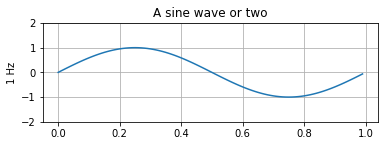

In [2]:
# importing some libraries

import matplotlib.pyplot as plt
import numpy as np


t = np.arange(0.0, 1.0, 0.01)
print(t)

fig = plt.figure(1)
ax1 = fig.add_subplot(211)
ax1.plot(t, np.sin(2*np.pi*t))
ax1.grid(True)
ax1.set_ylim((-2, 2))
ax1.set_ylabel('1 Hz')
ax1.set_title('A sine wave or two')

[0.00000000e+00 3.92699082e-03 7.85398163e-03 ... 3.14041456e+01
 3.14080726e+01 3.14119995e+01]
[0.00000e+00 1.25000e-04 2.50000e-04 ... 9.99625e-01 9.99750e-01
 9.99875e-01]


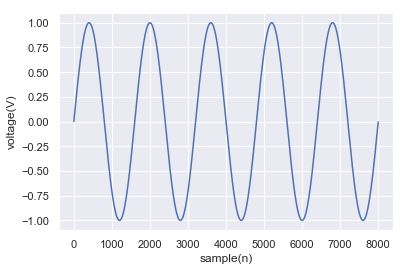

In [33]:
Fs = 8000
f = 5
sample = 8000
x = np.arange(sample)
print(2 * np.pi* f * x/ Fs)
print(x.astype(float)/Fs)
y = np.sin(2 * np.pi * f * x / Fs)
plt.plot(x, y)
plt.xlabel('sample(n)')
plt.ylabel('voltage(V)')
plt.show()

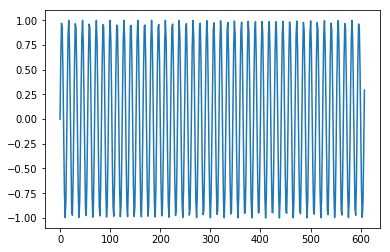

In [4]:
Fs = 1/1.45 # sampling frequency
sample = 420 # number of samples

f1 = 0.05 # frequency of sine wave 1
t = np.arange(sample)/Fs # converting time to seconds 

y = np.sin(2 * np.pi * f1 * t / Fs)
plt.plot(t, y)
#plt.axis([0, 20, -1, 1])


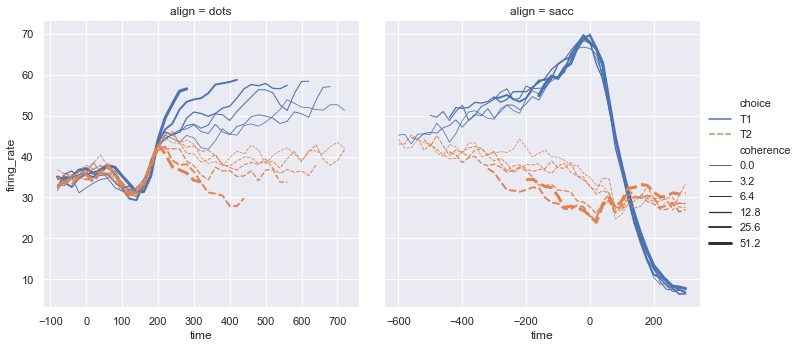

In [5]:
import seaborn as sns
sns.set()
dots = sns.load_dataset("dots")
sns.relplot(x="time", y="firing_rate", col="align",
            hue="choice", size="coherence", style="choice",
            facet_kws=dict(sharex=False),
            kind="line", legend="full", data=dots);

In [6]:
print(type(dots))
print(dots)

<class 'pandas.core.frame.DataFrame'>
    align choice  time  coherence  firing_rate
0    dots     T1   -80        0.0    33.189967
1    dots     T1   -80        3.2    31.691726
2    dots     T1   -80        6.4    34.279840
3    dots     T1   -80       12.8    32.631874
4    dots     T1   -80       25.6    35.060487
5    dots     T1   -80       51.2    34.987571
6    dots     T1   -60        0.0    32.868526
7    dots     T1   -60        3.2    35.119048
8    dots     T1   -60        6.4    34.841076
9    dots     T1   -60       12.8    35.648148
10   dots     T1   -60       25.6    33.610568
11   dots     T1   -60       51.2    34.277344
12   dots     T1   -40        0.0    34.561753
13   dots     T1   -40        3.2    34.895833
14   dots     T1   -40        6.4    34.963325
15   dots     T1   -40       12.8    36.471193
16   dots     T1   -40       25.6    32.534247
17   dots     T1   -40       51.2    35.009766
18   dots     T1   -20        0.0    35.358566
19   dots     T1   -20

In [7]:
iris = sns.load_dataset("iris")
print(iris)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
5             5.4          3.9           1.7          0.4     setosa
6             4.6          3.4           1.4          0.3     setosa
7             5.0          3.4           1.5          0.2     setosa
8             4.4          2.9           1.4          0.2     setosa
9             4.9          3.1           1.5          0.1     setosa
10            5.4          3.7           1.5          0.2     setosa
11            4.8          3.4           1.6          0.2     setosa
12            4.8          3.0           1.4          0.1     setosa
13            4.3          3.0    

# Now actually starting to generate the simulated data
We have 10 runs. Each run is 10 minutes long. TR = 1.45 and there are 420 time point

Location of an example csv file (only acessable on Humbvee):
/data/HBN-SSI/OUTPUT/pipeline_HBN-SSI/sub-0031133_ses-SSV9/roi_timeseries/_scan_FLANKERTASK/_compcor_ncomponents_5_selector_pc10.linear1.wm0.global0.motion1.quadratic1.gm0.compcor1.csf0/_bandpass_freqs_0.01.0.35/_mask_CC200_2mm



In [35]:
# Generating a time series
TR = 1.45
volumes = 420
t = np.arange(0.0, TR*volumes+1, 1.45)
#print(t)

we have a total of 200 ROIS - so need to generate 200 time series

1
(100, 421)
(100, 421)
(200, 421)
(421, 200)
[[ 0.          0.          0.         ... 33.23401872 33.23401872
  33.23401872]
 [21.99695849 21.99695849 21.99695849 ... 42.89650461 42.89650461
  42.89650461]
 [39.50775062 39.50775062 39.50775062 ... 46.92487286 46.92487286
  46.92487286]
 ...
 [47.04403845 47.04403845 47.04403845 ... 34.46300127 34.46300127
  34.46300127]
 [34.79563983 34.79563983 34.79563983 ... 20.80963686 20.80963686
  20.80963686]
 [15.45084972 15.45084972 15.45084972 ...  4.42309073  4.42309073
   4.42309073]]


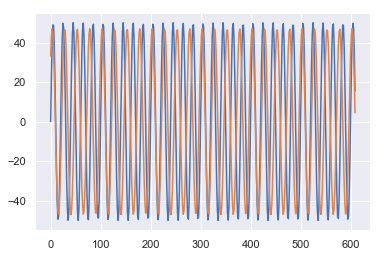

In [72]:
# generating data for the 1st visit
# TS = Time series
import scipy.linalg

f1 = 0.05 # frequency of sine wave 1
f2 = 0.04 # frequency of sine wave 2
shift = np.pi/4
y1 = 50*np.sin(2 * np.pi * f1 * t )
y2 = 47*np.sin(2 * np.pi * f2 * t + shift ) 
plt.plot(t, y1)
plt.plot(t, y2)
print(np.ndim(y1))

#Yall = np.array([y1, y2])
Y1 = np.tile(y1, (100,1))
Y2 = np.tile(y2, (100,1))
print(np.shape(Y1))
print(np.shape(Y2))

#Yall = np.array([[Y1], [Y2]])
Yall = np.block([[Y1], [Y2]])
print(np.shape(Yall))

# Need to transpose this
Yall = Yall.transpose()
print(np.shape(Yall))
print(Yall)

HEADER:

File	Sub-brick
		#	Mean_1  	Mean_2  	Mean_3  	Mean_4  	Mean_5  	Mean_6  	Mean_7  	Mean_8  	Mean_9  	Mean_10  	Mean_11  	Mean_12  	Mean_13  	Mean_14  	Mean_15  	Mean_16  	Mean_17  	Mean_18  	Mean_19  	Mean_20  	Mean_21  	Mean_22  	Mean_23  	Mean_24  	Mean_25  	Mean_26  	Mean_27     	Mean_28  	Mean_29  	Mean_30  	Mean_31  	Mean_32  	Mean_33  	Mean_34  	Mean_35  	Mean_36  	Mean_37  	Mean_38  	Mean_39  	Mean_40  	Mean_41  	Mean_42  	Mean_43  	Mean_
44  	Mean_45  	Mean_46  	Mean_47  	Mean_48  	Mean_49  	Mean_50  	Mean_51  	Mean_52  	Mean_53  	Mean_54  	Mean_55  	Mean_56  	Mean_57  	Mean_58  	Mean_59  	Mean_60  	Mean_61  	Mean_62  	Mean_63  	Mean_64  	Mean_65  	Mean_66  	Mean_67  	Mean_68  	Mean_69  	Mean_70  	Mean_71  	Mean_72     	Mean_73  	Mean_74  	Mean_75  	Mean_76  	Mean_77  	Mean_78  	Mean_79  	Mean_80  	Mean_81  	Mean_82  	Mean_83  	Mean_84  	Mean_85  	Mean_86  	Mean_87  	Mean_88  	Mean_
89  	Mean_90  	Mean_91  	Mean_92  	Mean_93  	Mean_94  	Mean_95  	Mean_96  	Mean_97  	Mean_98  	Mean_99  	Mean_100  	Mean_101  	Mean_102  	Mean_103  	Mean_104  	Mean_105  	Mean_106  	Mean_107  	Mean_108  	Mean_109  	Mean_110  	Mean_111  	Mean_112  	Mean_113  	Mean_114  	Mean_115  	Mean_116  	Mean_117    	Mean_118  	Mean_119  	Mean_120  	Mean_121  	Mean_122  	Mean_123  	Mean_124  	Mean_125  	Mean_126  	Mean_127  	Mean_128  	Mean_129  	Mean_130  	Mean_131  	Mean_132  	Mean_133  	Mean_
134  	Mean_135  	Mean_136  	Mean_137  	Mean_138  	Mean_139  	Mean_140  	Mean_141  	Mean_142  	Mean_143  	Mean_144  	Mean_145  	Mean_146  	Mean_147  	Mean_148  	Mean_149  	Mean_150  	Mean_151  	Mean_152  	Mean_153  	Mean_154  	Mean_155  	Mean_156  	Mean_157  	Mean_158  	Mean_159  	Mean_160  	Mean_161  	Mean_162    	Mean_163  	Mean_164  	Mean_165  	Mean_166  	Mean_167  	Mean_168  	Mean_169  	Mean_170  	Mean_171  	Mean_172  	Mean_173  	Mean_174  	Mean_175  	Mean_176  	Mean_177  	Mean_178  	Mean_
179  	Mean_180  	Mean_181  	Mean_182  	Mean_183  	Mean_184  	Mean_185  	Mean_186  	Mean_187  	Mean_188  	Mean_189  	Mean_190  	Mean_191  	Mean_192  	Mean_193  	Mean_194  	Mean_195  	Mean_196  	Mean_197  	Mean_198  	Mean_199  	Mean_200

In [89]:
#Saving file 
#np.savetxt('blah.csv', a, fmt='%.2f', delimiter=',', header=" #1,  #2,  #3,  #4")
head = "Mean_1	Mean_2	Mean_3	Mean_4	Mean_5	Mean_6	Mean_7	Mean_8	Mean_9  	Mean_10  	Mean_11  	Mean_12  	Mean_13  	Mean_14  	Mean_15  	Mean_16  	Mean_17  	Mean_18  	Mean_19  	Mean_20  	Mean_21  	Mean_22  	Mean_23  	Mean_24  	Mean_25  	Mean_26  	Mean_27     	Mean_28  	Mean_29  	Mean_30  	Mean_31  	Mean_32  	Mean_33  	Mean_34  	Mean_35  	Mean_36  	Mean_37  	Mean_38  	Mean_39  	Mean_40  	Mean_41  	Mean_42  	Mean_43  	Mean_44  	Mean_45  	Mean_46  	Mean_47  	Mean_48  	Mean_49  	Mean_50  	Mean_51  	Mean_52  	Mean_53  	Mean_54  	Mean_55  	Mean_56  	Mean_57  	Mean_58  	Mean_59  	Mean_60  	Mean_61  	Mean_62  	Mean_63  	Mean_64  	Mean_65  	Mean_66  	Mean_67  	Mean_68  	Mean_69  	Mean_70  	Mean_71  	Mean_72     	Mean_73  	Mean_74  	Mean_75  	Mean_76  	Mean_77  	Mean_78  	Mean_79  	Mean_80  	Mean_81  	Mean_82  	Mean_83  	Mean_84  	Mean_85  	Mean_86  	Mean_87  	Mean_88  	Mean_89  	Mean_90  	Mean_91  	Mean_92  	Mean_93  	Mean_94  	Mean_95  	Mean_96  	Mean_97  	Mean_98  	Mean_99  	Mean_100  	Mean_101  	Mean_102  	Mean_103  	Mean_104  	Mean_105  	Mean_106  	Mean_107  	Mean_108  	Mean_109  	Mean_110  	Mean_111  	Mean_112  	Mean_113  	Mean_114  	Mean_115  	Mean_116  	Mean_117    	Mean_118  	Mean_119  	Mean_120  	Mean_121  	Mean_122  	Mean_123  	Mean_124  	Mean_125  	Mean_126  	Mean_127  	Mean_128  	Mean_129  	Mean_130  	Mean_131  	Mean_132  	Mean_133  	Mean_134  	Mean_135  	Mean_136  	Mean_137  	Mean_138  	Mean_139  	Mean_140  	Mean_141  	Mean_142  	Mean_143  	Mean_144  	Mean_145  	Mean_146  	Mean_147  	Mean_148  	Mean_149  	Mean_150  	Mean_151  	Mean_152  	Mean_153  	Mean_154  	Mean_155  	Mean_156  	Mean_157  	Mean_158  	Mean_159  	Mean_160  	Mean_161  	Mean_162    	Mean_163  	Mean_164  	Mean_165  	Mean_166  	Mean_167  	Mean_168  	Mean_169  	Mean_170  	Mean_171  	Mean_172  	Mean_173  	Mean_174  	Mean_175  	Mean_176  	Mean_177  	Mean_178  	Mean_179  	Mean_180  	Mean_181  	Mean_182  	Mean_183  	Mean_184  	Mean_185  	Mean_186  	Mean_187  	Mean_188  	Mean_189  	Mean_190  	Mean_191  	Mean_192  	Mean_193  	Mean_194  	Mean_195  	Mean_196  	Mean_197  	Mean_198  	Mean_199  	Mean_200"

# Runs 1, 8, 9, and 10 have the same time series
# run 1
np.savetxt('run1.csv', Yall, fmt='%.6f', delimiter='\t', header=head)
# run 8
np.savetxt('run8.csv', Yall, fmt='%.6f', delimiter='\t', header=head)
# run 9
np.savetxt('run9.csv', Yall, fmt='%.6f', delimiter='\t', header=head)
# run 10
np.savetxt('run10.csv', Yall, fmt='%.6f', delimiter='\t', header=head)





# run2, run6 and run7

In [93]:
f1 = 0.05 # frequency of sine wave 1
f2 = 0.04 # frequency of sine wave 2

y1_1 = 50*np.sin(2 * np.pi * f1 * t )
y1_2 = 50*np.sin(2 * np.pi * f1 * t + np.pi/2) # + 90o

shift = np.pi/4
y2_1 = 47*np.sin(2 * np.pi * f2 * t + shift ) 
y2_2 = 47*np.sin(2 * np.pi * f2 * t + shift + np.pi/2 ) # + 90o

# Creating the large matrix
Y1_1 = np.tile(y1_1, (50,1))
Y1_2 = np.tile(y1_2, (50,1))
Y2_1 = np.tile(y2_1, (50,1))
Y2_2 = np.tile(y2_2, (50,1))
#print(np.shape(Y1_1))
#print(np.shape(Y2_1))

# combining all results
Yall = np.block([[Y1_1], [Y1_2], [Y2_1], [Y2_2]])
print(np.shape(Yall))

# Need to transpose this
Yall = Yall.transpose()
print(np.shape(Yall))
print(Yall)


# Runs 2, 6, and 7
# run 2
np.savetxt('run2.csv', Yall, fmt='%.6f', delimiter='\t', header=head)
# run 6
np.savetxt('run6.csv', Yall, fmt='%.6f', delimiter='\t', header=head)
# run 7
np.savetxt('run7.csv', Yall, fmt='%.6f', delimiter='\t', header=head)





(200, 421)
(421, 200)
[[  0.           0.           0.         ...  33.23401872  33.23401872
   33.23401872]
 [ 21.99695849  21.99695849  21.99695849 ...  19.20650651  19.20650651
   19.20650651]
 [ 39.50775062  39.50775062  39.50775062 ...   2.65637112   2.65637112
    2.65637112]
 ...
 [ 47.04403845  47.04403845  47.04403845 ... -31.9578088  -31.9578088
  -31.9578088 ]
 [ 34.79563983  34.79563983  34.79563983 ... -42.14212873 -42.14212873
  -42.14212873]
 [ 15.45084972  15.45084972  15.45084972 ... -46.79141234 -46.79141234
  -46.79141234]]


# run3, run4, and run5

In [95]:
f1 = 0.05 # frequency of sine wave 1
f2 = 0.04 # frequency of sine wave 2

y1_1_1 = 50*np.sin(2 * np.pi * f1 * t )
y1_1_2 = 50*np.sin(2 * np.pi * f1 * t + np.pi/4 ) # +45o
y1_2_1 = 50*np.sin(2 * np.pi * f1 * t + np.pi/2)  # + 90o
y1_2_2 = 50*np.sin(2 * np.pi * f1 * t + np.pi/2 + np.pi/4)  # + 90o + 45o

shift = np.pi/4
y2_1_1 = 47*np.sin(2 * np.pi * f2 * t + shift )
y2_1_2 = 47*np.sin(2 * np.pi * f2 * t + shift + np.pi/4) # + 45o 
y2_2_1 = 47*np.sin(2 * np.pi * f2 * t + shift + np.pi/2 ) # + 90o
y2_2_2 = 47*np.sin(2 * np.pi * f2 * t + shift + np.pi/2 + np.pi/4) # + 90o + 45o

# Creating the large matrix
Y1_1_1 = np.tile(y1_1_1, (25,1))
Y1_1_2 = np.tile(y1_1_2, (25,1))
Y1_2_1 = np.tile(y1_2_1, (25,1))
Y1_2_2 = np.tile(y1_2_2, (25,1))
Y2_1_1 = np.tile(y2_1_1, (25,1))
Y2_1_2 = np.tile(y2_1_2, (25,1))
Y2_2_1 = np.tile(y2_2_1, (25,1))
Y2_2_2 = np.tile(y2_2_2, (25,1))

#print(np.shape(Y1_1))
#print(np.shape(Y2_1))

# combining all results
Yall = np.block([[Y1_1_1], [Y1_1_2], 
                 [Y1_2_1], [Y1_2_2], 
                 [Y2_1_1], [Y2_1_2], 
                 [Y2_2_1], [Y2_2_2]])
print(np.shape(Yall))

# Need to transpose this
Yall = Yall.transpose()
print(np.shape(Yall))
print(Yall)


# Runs 3, 4, and 5
# run 3
np.savetxt('run3.csv', Yall, fmt='%.6f', delimiter='\t', header=head)
# run 4
np.savetxt('run4.csv', Yall, fmt='%.6f', delimiter='\t', header=head)
# run 5
np.savetxt('run5.csv', Yall, fmt='%.6f', delimiter='\t', header=head)

(200, 421)
(421, 200)
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  5.75583996e-15
   5.75583996e-15  5.75583996e-15]
 [ 2.19969585e+01  2.19969585e+01  2.19969585e+01 ... -1.67513583e+01
  -1.67513583e+01 -1.67513583e+01]
 [ 3.95077506e+01  3.95077506e+01  3.95077506e+01 ... -3.13025578e+01
  -3.13025578e+01 -3.13025578e+01]
 ...
 [ 4.70440384e+01  4.70440384e+01  4.70440384e+01 ... -4.69666052e+01
  -4.69666052e+01 -4.69666052e+01]
 [ 3.47956398e+01  3.47956398e+01  3.47956398e+01 ... -4.45136203e+01
  -4.45136203e+01 -4.45136203e+01]
 [ 1.54508497e+01  1.54508497e+01  1.54508497e+01 ... -3.62141224e+01
  -3.62141224e+01 -3.62141224e+01]]
